In [84]:
import pandas as pd
import os

import matplotlib.pyplot as plt

from scipy import signal

import scipy.fft as fourier
from scipy.signal.windows import hann

import numpy as np

import re

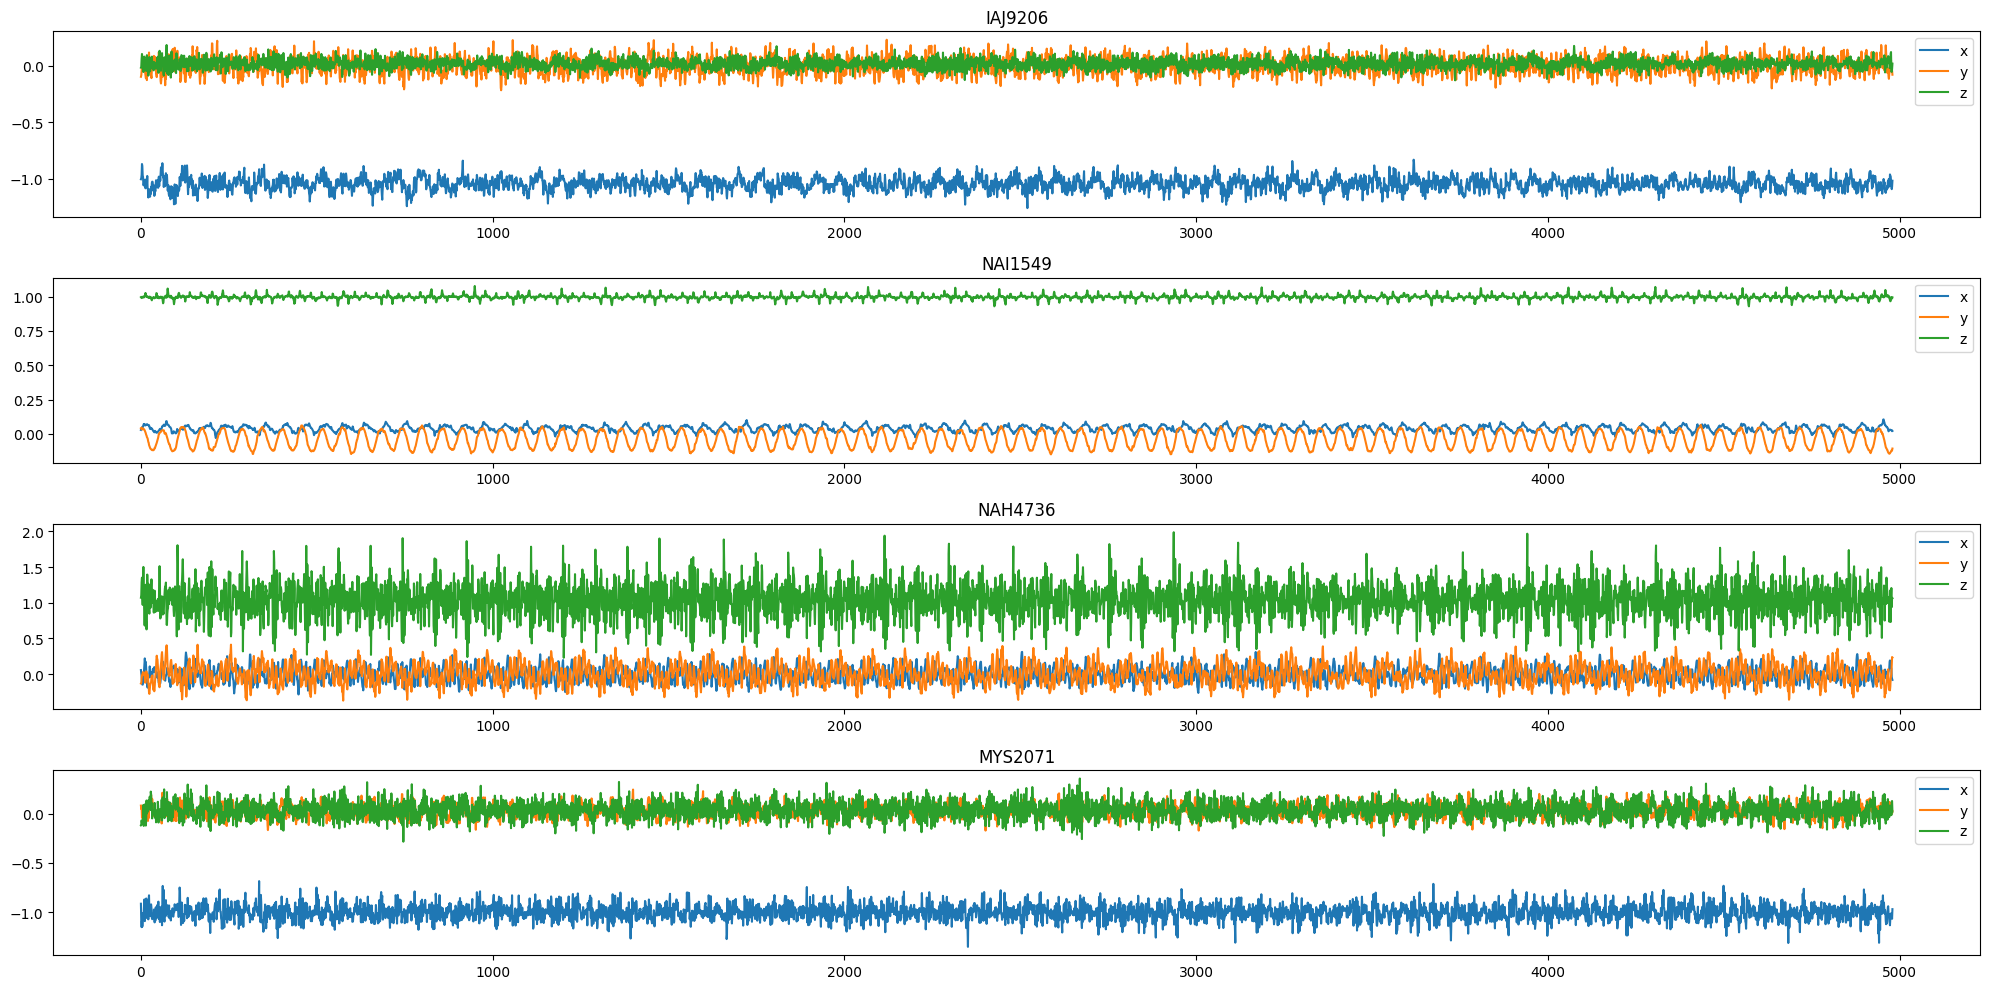

In [85]:
path = "./part_1/"
files = os.listdir(path)

#regex pattern to separate start, interval and sensor
pat = re.compile("([0-9]*)-([0-9]*)-([A-Za-z]*[0-9]*)") 
infos = [re.findall(pat,file)[0] for file in files]

fig, axs= plt.subplots(4,1,figsize=(20,10))

for i,file in enumerate(files):
    data = pd.read_csv(path+file)
    data.plot(ax=axs[i])
    axs[i].set_title(infos[i][2])

plt.tight_layout()

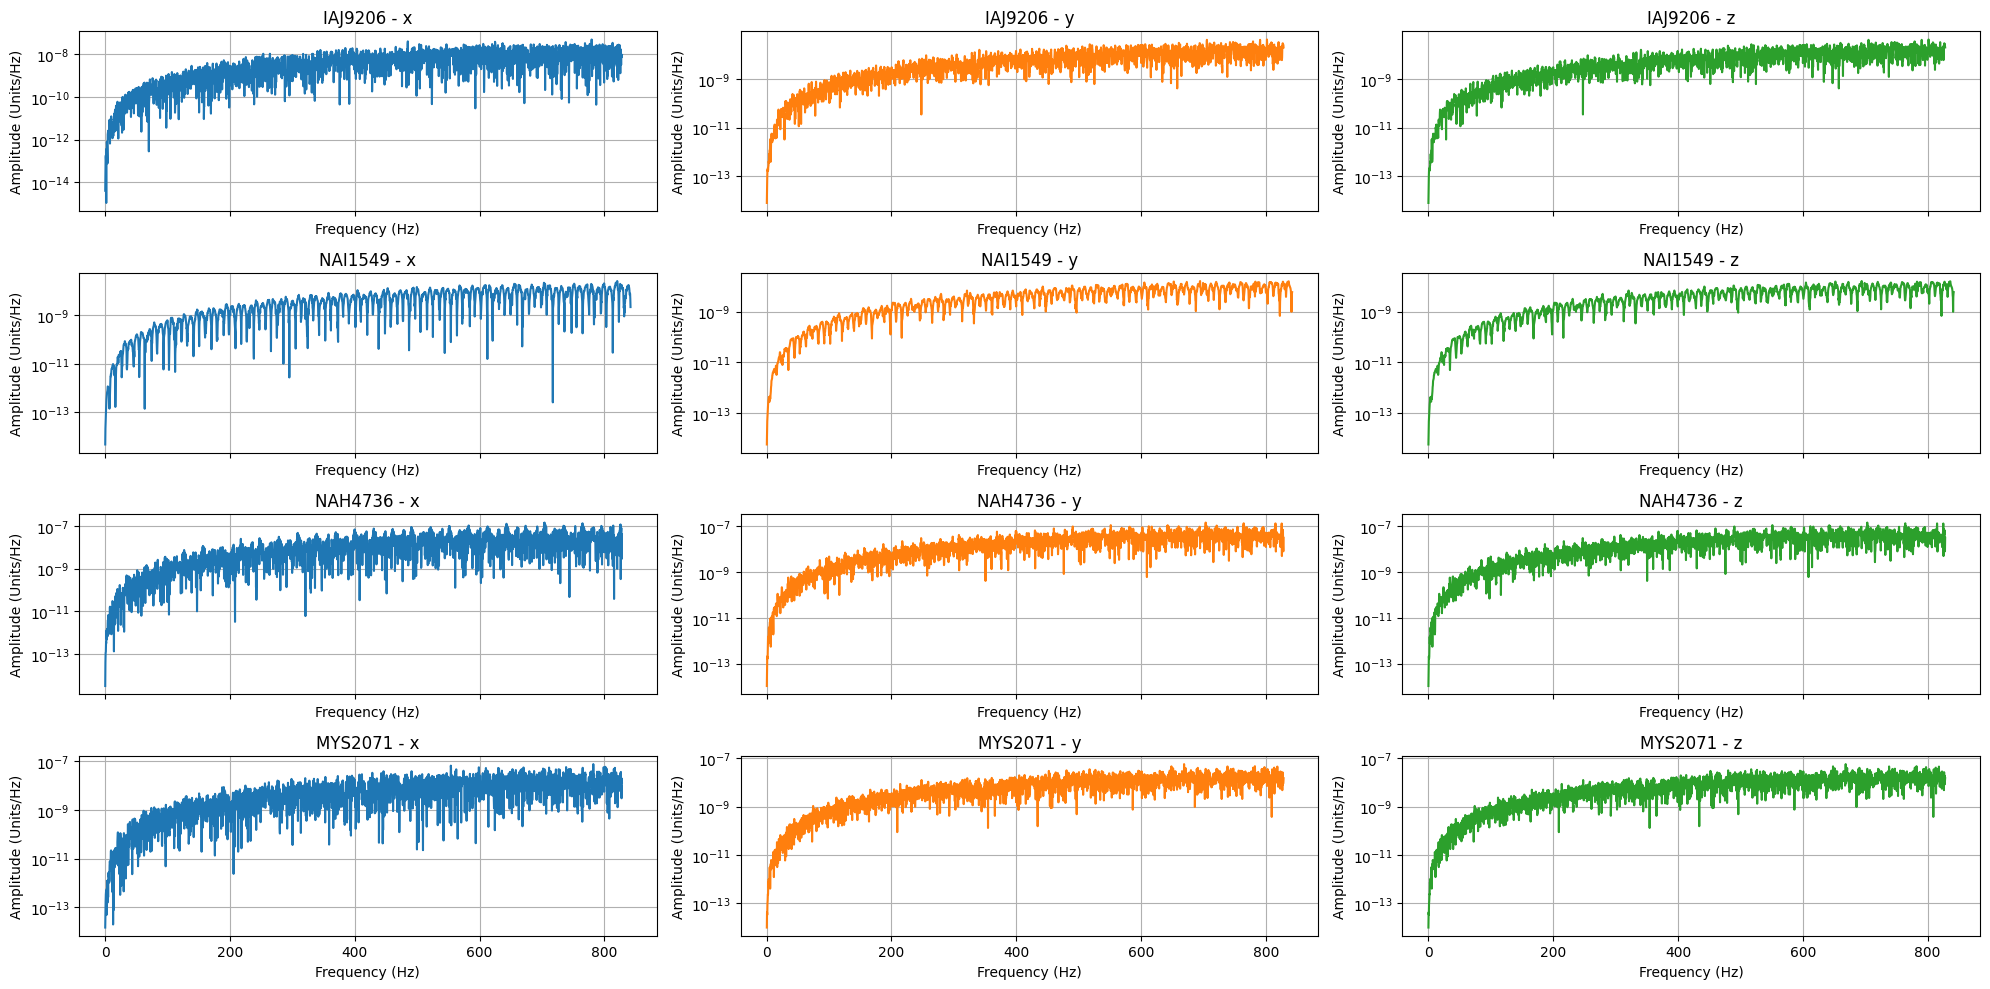

In [118]:
fig, axs= plt.subplots(4,3,figsize=(20,10),sharex=True)


for i,file in enumerate(files):

    data = pd.read_csv(path+files[i])

    dataCentered = data - data.mean() #centering data 

    N = data.shape[0]

    T = int(infos[i][1])/1000 #s

    window = hann(N)
    xf = fourier.fft(dataCentered.mul(window,axis=0))
    freq = fourier.fftfreq(N,d=T/N)

    absolute = np.abs(xf)
    for j in range(3):
        absolute[:,j] = absolute[:,j]/np.sum(window) *2/N

        axs[i,j].semilogy(freq[1:N//2],absolute[1:N//2,j],color='C'+str(j))
        axs[i,j].set_title(infos[i][2] + " - " + data.columns[j])
        axs[i,j].set_xlabel('Frequency (Hz)')
        axs[i,j].set_ylabel('Amplitude (Units/Hz)')
        axs[i,j].grid()

plt.tight_layout()

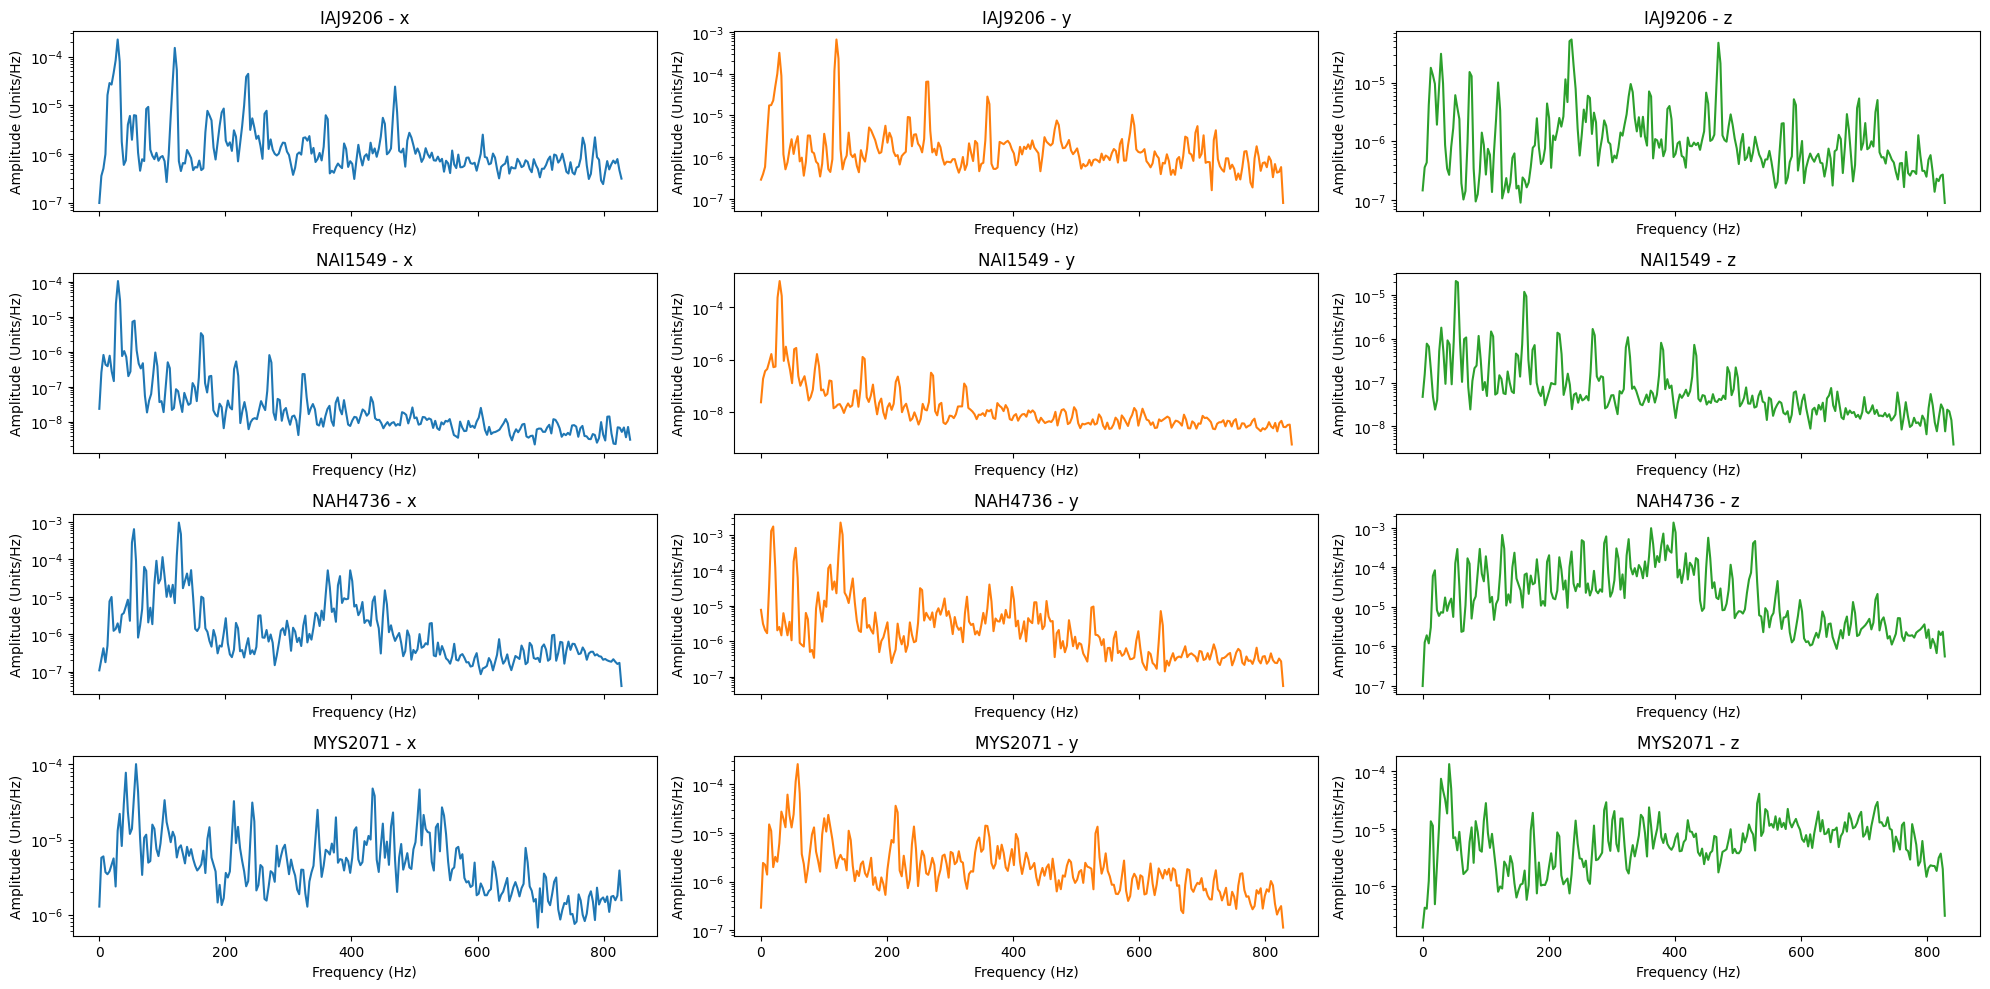

In [131]:
fig, axs= plt.subplots(4,3,figsize=(20,10),sharex=True)


for i,file in enumerate(files):
    data = pd.read_csv(path+files[i])

    dataCentered = data - data.mean() #centering data

    N = data.shape[0]

    T = int(infos[i][1])/1000 #s

    fs = N / T          # taxa de amostragem

    # nyquist frequency - the most relevant
    fn = fs/2

    f, Pxx = signal.welch(dataCentered['x'].to_numpy(), fs=fs, window='hann', nperseg=512, noverlap=256, scaling='density',average='median')
    _, Pyy = signal.welch(dataCentered['y'].to_numpy(), fs=fs, window='hann', nperseg=512, noverlap=256, scaling='density',average='median')
    _, Pzz = signal.welch(dataCentered['z'].to_numpy(), fs=fs, window='hann', nperseg=512, noverlap=256, scaling='density',average='median')

    P_g = [Pxx, Pyy, Pzz]
    
    for j, ax in enumerate(axs[i]):
        ax.semilogy(f, P_g[j], color='C'+str(j))
        ax.set_title(infos[i][2] + " - " + data.columns[j])
        ax.set_xlabel('Frequency (Hz)')
        ax.set_ylabel('Amplitude (Units/Hz)')
        

plt.tight_layout()

(array([ 1.,  0.,  1.,  2.,  1.,  2.,  4.,  8.,  8.,  6., 10., 14., 12.,
        22., 25., 15., 20., 30., 25., 19., 11.,  9.,  5.,  2.,  1.,  2.,
         0.,  1.,  0.,  1.]),
 array([-6.71691644, -6.6222713 , -6.52762616, -6.43298102, -6.33833587,
        -6.24369073, -6.14904559, -6.05440045, -5.95975531, -5.86511017,
        -5.77046503, -5.67581989, -5.58117475, -5.48652961, -5.39188446,
        -5.29723932, -5.20259418, -5.10794904, -5.0133039 , -4.91865876,
        -4.82401362, -4.72936848, -4.63472334, -4.54007819, -4.44543305,
        -4.35078791, -4.25614277, -4.16149763, -4.06685249, -3.97220735,
        -3.87756221]),
 <BarContainer object of 30 artists>)

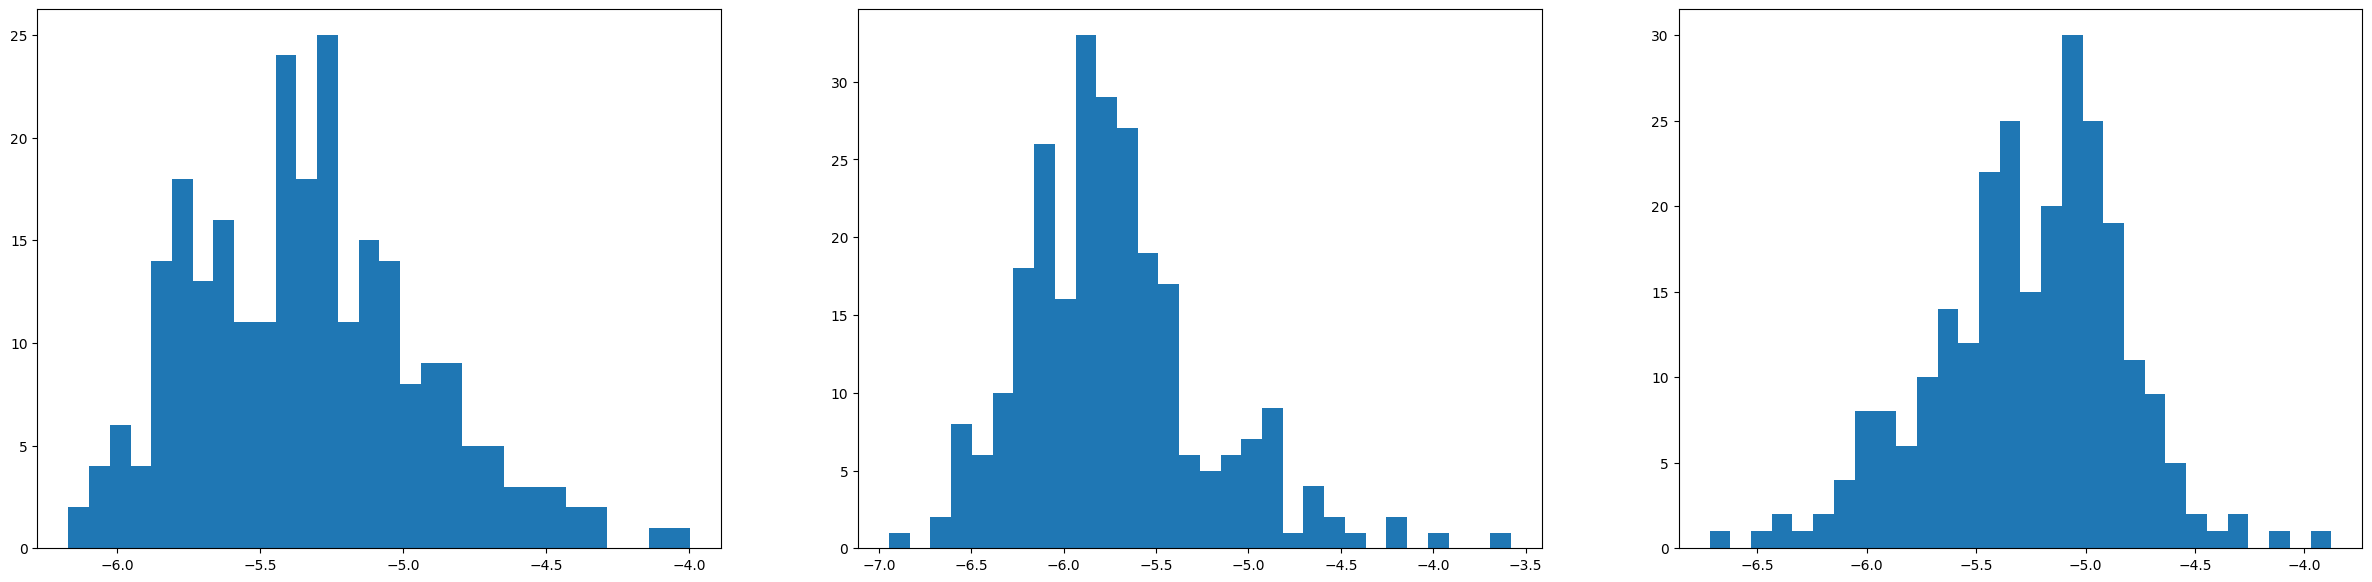

In [133]:
fig,axs = plt.subplots(1,3,figsize=(30,7))
axs[0].hist(np.log10(Pxx),bins=30)
axs[1].hist(np.log10(Pyy),bins=30)
axs[2].hist(np.log10(Pzz),bins=30)